In [1]:
import pandas as pd
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
from scipy import stats

### Define os parâmetros de entrada para o Grupo 12

In [2]:
rep_cycle_hengelson = [7,2,7,7,7,2,2,5,6,5,6,5,6,1,6,4,3,4,3,4]
rep_cycle_tgs = [7,6,4,5,2,2,3,7,6,4,5,1,7,6,4,3,2,5,7,6]
rep_cycle_own = [7,6,4,5,7,2,6,5,4,7,2,6,3,4,1,5,7,2,6,3]

rep_cycle_full = 2*rep_cycle_hengelson

data = {0:[718, 723.5, 662.6, 701.7, 714.2, 748.3, 655.1],
        1:[591, 546.7, 540, 603.6, 522.7, 609.1, 580.3], 
        2:[741, 745.5, 699.7, 766.5, 753.3, 590.1, 714.8], 
        3:[769, 702.1, 644.6, 783.7, 756.3, 682.4, 730.2], 
        4:[748, 746.1, 709.5, 789.6, 648.1, 692.5, 730.9]}

dados = pd.DataFrame(data=data, index=[1,2,3,4,5,6,7])

In [3]:
arrays = [range(len(rep_cycle_full)), ['Inicio', 'Fim']]
index = pd.MultiIndex.from_product(arrays, names=['Pos', 'state'])
df = pd.DataFrame(index=range(5), columns=index)

### Define a função que cálcula o Gannt para determinada sequência de produtos a serem produzidos

In [4]:
def gen_gannt(seq):
    rep_cycle_full = seq*2
    stations_list = range(5)
    
    arrays = [range(len(rep_cycle_full)), ['Inicio', 'Fim']]
    index = pd.MultiIndex.from_product(arrays, names=['Pos', 'state'])
    df = pd.DataFrame(index=range(5), columns=index)
    
    for station in stations_list:
        if station == 0:
            for i,j in enumerate(rep_cycle_full):
                if i == 0:
                    df.loc[station, (i, 'Inicio')] = 0
                    df.loc[station, (i, 'Fim')] = dados.loc[j, station]
                else:
                    df.loc[0, (i, 'Inicio')] = df.loc[0, (i-1, 'Fim')]
                    df.loc[0, (i, 'Fim')] = df.loc[0, (i, 'Inicio')] + dados.loc[j, station]
        else:
            for i,j in enumerate(rep_cycle_full):
                if i == 0:
                    df.loc[station, (i, 'Inicio')] = df.loc[station-1, (i, 'Fim')]
                    df.loc[station, (i, 'Fim')] = df.loc[station, (i, 'Inicio')] + dados.loc[j, station]
                else:
                    df.loc[station, (i, 'Inicio')] = max([df.loc[station-1, (i, 'Fim')],df.loc[station, (i-1, 'Fim')]])
                    df.loc[station, (i, 'Fim')] = df.loc[station, (i, 'Inicio')] + dados.loc[j, station]

    return df

### Gera 1000 sequências aleatórias considerando as demandas de cada produto
Créditos: Grupo10

In [5]:
tarefasOrder = []
possibleNumbers = []

for i in range (0,1000):  
    partial_list = []
    l1 = 1
    l2 = 3
    l3 = 2
    l4 = 3
    l5 = 3
    l6 = 4
    l7 = 4
    nextNumber = ''
    for j in range (0,20):
        possibleNumbers = []
        if l1>=1:
            possibleNumbers.append(1)
        if l2>=1:
            possibleNumbers.append(2)
        if l3>=1:
            possibleNumbers.append(3)
        if l4>=1:
            possibleNumbers.append(4)
        if l5>=1:
            possibleNumbers.append(5)
        if l6>=1:
            possibleNumbers.append(6)
        if l7>=1:
            possibleNumbers.append(7)

        nextNumber = random.choice(possibleNumbers)

        if(nextNumber==1):
            l1=l1-1
        if(nextNumber==2):
            l2=l2-1
        if(nextNumber==3):
            l3=l3-1
        if(nextNumber==4):
            l4=l4-1
        if(nextNumber==5):
            l5=l5-1
        if(nextNumber==6):
            l6=l6-1
        if(nextNumber==7):
            l7=l7-1
        partial_list.append(nextNumber)
    tarefasOrder.append(partial_list)

#     print(tarefasOrder)
#     tarefasOrder.clear()

In [6]:
dic = {}
for i,j in enumerate(tarefasOrder):
    dic[i] = (gen_gannt(j),j)

### Gannt gerado para uma das sequências aleatórias

In [7]:
dic[750][0]

Pos        0               1               2               3               4   \
state  Inicio     Fim  Inicio     Fim  Inicio     Fim  Inicio     Fim  Inicio   
0           0   662.6   662.6  1386.1  1386.1  2100.3  2100.3  2814.5  2814.5   
1       662.6  1202.6  1386.1  1932.8  2100.3    2623  2814.5  3337.2  3516.2   
2      1202.6  1902.3  1932.8  2678.3  2678.3  3431.6  3431.6  4184.9  4184.9   
3      1902.3  2546.9  2678.3  3380.4  3431.6  4187.9  4187.9  4944.2  4951.4   
4      2546.9  3256.4  3380.4  4126.5  4187.9    4836  4944.2  5592.3  5735.1   

Pos            ...       35                36                37           \
state     Fim  ...   Inicio      Fim   Inicio      Fim   Inicio      Fim   
0      3516.2  ...  24594.9  25343.2  25343.2  25998.3  25998.3  26653.4   
1      4119.8  ...  25343.2  25952.3  25998.3  26578.6  26653.4  27233.7   
2      4951.4  ...    26345  26935.1  26935.1  27649.9  27649.9  28364.7   
3      5735.1  ...    27475  28157.4  28157.4  28887.6  28887.6  29617.8   
4      6524.7  ...  28321.8  29014.3  29014.3  29745.2  29745.2  30476.1   

Pos         38                39           
state   Inicio      Fim   Inicio      Fim  
0      26653.4  27401.7  27401.7    28150  
1      27401.7  28010.8    28150  28759.1  
2      28364.7  28954.8  28954.8  29544.9  
3      29617.8  30300.2  30300.2  30982.6  
4      30476.1  31168.6  31168.6  31861.1  

[5 rows x 80 columns]

### Define a função para a métrica e calcula-a para os itens a), b), d) e para as 1000 sequências aleatórias

Métrica: $k = \frac{tempo\;total\;real}{tempo\;total\;ideal} - 1 = \frac{tempo\;total\;real}{40c}-1$

sendo:
    1. Tempo total real - Tempo necessário para produzir 40 unidades considerando ociosidades forçadas pelo desbalanceamento da linha
    2. Tempo total ideal - Tempo necessário para produzir 40 unidades caso o tempo de ciclo da linha fosse seguido

In [8]:
def calc_metric(gannt):
    ideal_full_cycle = 722*40
    return (gannt.loc[4, (39, 'Fim')]/ideal_full_cycle)-1

hengelson_metric = calc_metric(gen_gannt(rep_cycle_hengelson))
tgs_metric = calc_metric(gen_gannt(rep_cycle_tgs))
own_metric = calc_metric(gen_gannt(rep_cycle_own))
work_metrics = [hengelson_metric, own_metric, tgs_metric]

metrics = []
for i in dic.keys():
    metrics.append(calc_metric(dic[i][0]))

full_metrics = metrics + work_metrics

full_sorted_metrics = sorted(full_metrics)#.sorted()

In [9]:
hengelson_index = full_metrics.index(hengelson_metric)
tgs_index = full_metrics.index(tgs_metric)
own_index = full_metrics.index(own_metric)

Text(0.5, 1.0, 'Métrica para os 1000 sequenciamentos aleatórios')

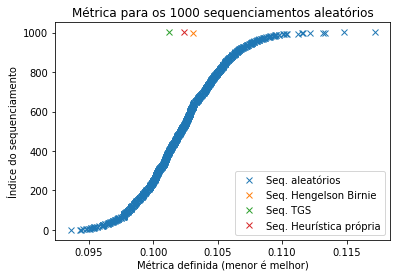

In [10]:
fig1, ax1 = plt.subplots()
ax1.plot(full_sorted_metrics,range(len(full_sorted_metrics)), 'x', label='Seq. aleatórios')
ax1.plot(hengelson_metric,hengelson_index, 'x', label='Seq. Hengelson Birnie')
ax1.plot(tgs_metric,tgs_index, 'x', label='Seq. TGS')
ax1.plot(own_metric,own_index, 'x', label='Seq. Heurística própria')
ax1.legend()
plt.ylabel('Índice do sequenciamento')
plt.xlabel('Métrica definida (menor é melhor)')
plt.title('Métrica para os 1000 sequenciamentos aleatórios')

Text(0.5, 1.0, 'Distribuição de 1000 sequências')

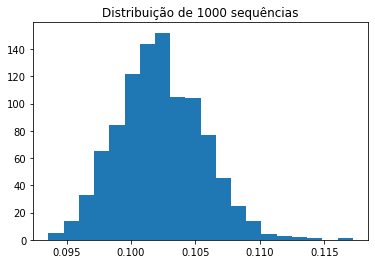

In [11]:
fig2, ax2 = plt.subplots()
ax2.hist(metrics, bins=20)#, density=True)#, cumulative=True)
plt.title('Distribuição de 1000 sequências')

In [12]:
print(stats.describe(full_metrics))

DescribeResult(nobs=1003, minmax=(0.09359418282548448, 0.11719875346260378), mean=0.10226035536051122, variance=1.079570822290534e-05, skewness=0.30781685280606935, kurtosis=0.34812471009365353)
